# W2 Lab: Data processing basics and John Snow's map

Follow the contents of this notebook and answer all questions (e.g. **Q1: ...**)

## If you are not familiar with Python yet... 

Maybe you can quickly review these basics first.

* [numbers](https://docs.python.org/3.6/tutorial/introduction.html#numbersnumbers) and [strings](https://docs.python.org/3.6/tutorial/introduction.html#strings);
* [if](https://docs.python.org/3.6/tutorial/controlflow.html#if-statements) and [for](https://docs.python.org/3.6/tutorial/controlflow.html#for-statements) statement
* data structure ([lists](https://docs.python.org/3.6/tutorial/introduction.html#lists), [sets](https://docs.python.org/3.6/tutorial/datastructures.html#sets), [dictionaries](https://docs.python.org/3.6/tutorial/datastructures.html#dictionaries))
* [functions](https://docs.python.org/3.6/tutorial/controlflow.html#defining-functions) and [modules](https://docs.python.org/3.6/tutorial/modules.html)

[Google's Python Class](https://developers.google.com/edu/python/?hl=en) is also a nice resource.

## Jupyter + Pandas = Awesomeness

[Jupyter notebook (lab)](http://jupyter.org) (and [IPython](https://ipython.org)) and [Pandas](http://pandas.pydata.org) may be two most important libraries responsible for the `Python`'s rise in data science. `Jupyter` lets you interactively explore datasets and code; `Pandas` lets you handle tabular datasets with superb speed and convenience. And they work so well together! In many cases, `Jupyter` and `Pandas` are all you need to load, clean, transform, visualize, and understand a dataset.

If you are not familiar with `Pandas`, you may want to follow their official tutorial called [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html) now or in the near future. 

## Importing pandas

The convention for importing `pandas` is the following

In [1]:
import pandas as pd

You can check the version of the library. Because pandas is fast-evolving library, you want to make sure that you have the up-to-date version of the library. 

In [2]:
pd.__version__

'0.22.0'

## Loading a CSV data file

Using pandas, you can read tabular data files in [many formats and through many protocols](https://pandas.pydata.org/pandas-docs/stable/io.html). Pandas supports not only flat files such as `.csv`, but also various other formats including clipboard, Excel, JSON, HTML, Feather, Parquet, SQL, Google BigQuery, and so on. Moreover, you can pass a local file path or a URL. If it's on Amazon S3, just pass a url like `s3://path/to/file.csv`. If it's on a webpage, then just use `https://some/url.csv`. 

Let's load a dataset about the location of pumps in the John Snow's map. You can download the file to your computer and try to load it using the local path too. 

In [3]:
pump_df = pd.read_csv('https://raw.githubusercontent.com/yy/dviz-course/master/data/pumps.csv')

`df` stands for "[Data Frame](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)", which is a fundamental data object in Pandas. You can take a look at the dataset by looking at the first few lines.

In [4]:
pump_df.head() 

,X,Y
0,8.651201,17.891600
1,10.984780,18.517851
2,13.378190,17.394541
3,14.879830,17.809919
4,8.694768,14.905470


**Q1: can you print only the first three lines?** Refer: http://pandas.pydata.org/pandas-docs/stable/index.html

In [5]:
# TODO: write your code here



You can also sample several rows randomly. If the data is sorted in some ways, sampling may give you a rather unbiased view of the dataset.  

In [6]:
pump_df.sample(5)

,X,Y
12,8.999440,5.101023
2,13.378190,17.394541
0,8.651201,17.891600
3,14.879830,17.809919
8,13.521460,7.958250


You can also figure out the number of rows in the dataset by running 

In [7]:
len(pump_df)

13

Note that `df.size` does not give you the number of rows. It tells you the number of elements. 

In [8]:
pump_df.size

26

You can also look into the shape of the dataset as well as what are the columns in the dataset. 

In [9]:
pump_df.shape  # 13 rows and 2 columns

(13, 2)

In [10]:
pump_df.columns

Index(['X', 'Y'], dtype='object')

You can also check out basic descriptive statistics of the whole dataset by using `describe()` method.  

In [11]:
pump_df.describe()

,X,Y
count,13.000000,13.000000
mean,12.504677,11.963446
std,3.376869,4.957821
min,8.651201,5.046838
25%,8.999440,7.958250
50%,12.571360,11.727170
75%,14.879830,17.394541
max,18.914391,18.517851


You can slice the data like a list

In [12]:
pump_df[:2]

,X,Y
0,8.651201,17.891600
1,10.984780,18.517851


In [13]:
pump_df[-2:]

,X,Y
11,16.00511,5.046838
12,8.99944,5.101023


In [14]:
pump_df[1:5]

,X,Y
1,10.984780,18.517851
2,13.378190,17.394541
3,14.879830,17.809919
4,8.694768,14.905470


or filter rows using some conditions. 

In [15]:
pump_df[pump_df.X > 13]

,X,Y
2,13.378190,17.394541
3,14.879830,17.809919
8,13.521460,7.958250
9,16.434891,9.252130
10,18.914391,9.737819
11,16.005110,5.046838


Now let's load another CSV file that documents the cholera deaths. The URL is https://raw.githubusercontent.com/yy/dviz-course/master/data/deaths.csv

**Q2: load the death dataset and inspect it**
1. **load this dataset as `death_df`.**
2. **show the first 2 rows. **
3. **show the total number of rows.**

In [18]:
# TODO: write your code here. You probably want to create multiple cells. 

## Some visualizations?

Let's visualize them! Pandas actually provides [a nice visualization interface](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) that uses [matplotlib](https://matplotlib.org) under the hood. You can do many basic plots without learning `matplotlib`. So let's try. 

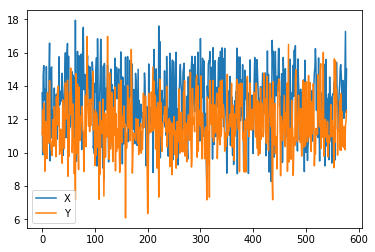

In [21]:
death_df.plot()

Oh by the way, you may not see any plot. If you don't see anything run the following command and run the plot command again. 

In [22]:
%matplotlib inline

The commands that start with `%` is called [the magic commands](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib), which are available in IPython and Jupyter. The purpose of this command is telling the IPython / Jupyter to show the plot right here instead of trying to use other external viewers. 

Anyway, this doesn't seem like the plot we want. Instead of putting each row as a point in a 2D plane by using the X and Y as the coordinate, it just created a line chart. Let's fix it. Please take a look at [the plot method documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html). How should we change the command? Which `kind` of plot do we want to draw? 

Yes, we want to draw a *scatter plot* using x and y as the Cartesian coordinates. 

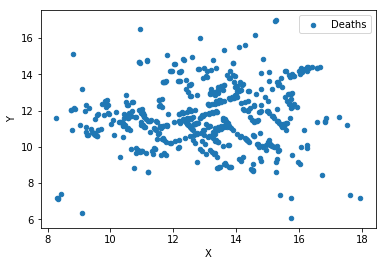

In [23]:
death_df.plot(x='X', y='Y', kind='scatter', label='Deaths')

I think I want to reduce the size of the dots and change the color to black. But it is difficult to find how to do that! It is sometimes quite annoying to figure out how to change how the visualization looks, especially when we use `matplotlib`. Unlike some other advanced tools, `matplotlib` does not provide a very coherent way to adjust your visualizations. That's one of the reasons why there are lots of visualization libraries that *wrap* `matplotlib`. Anyway, this is how you do it. 


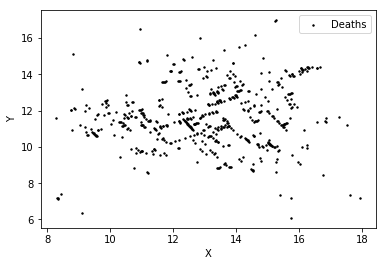

In [24]:
death_df.plot(x='X', y='Y', kind='scatter', label='Deaths', s=2, c='black')

Can we visualize both deaths and pumps? 

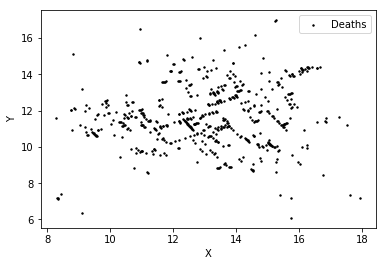

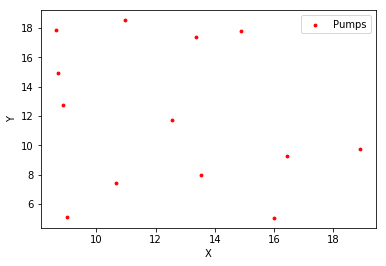

In [25]:
death_df.plot(x='X', y='Y', s=2, c='black', kind='scatter', label='Deaths')
pump_df.plot(x='X', y='Y', kind='scatter', c='red', s=8, label='Pumps')

## Figure and Axes

Why do we have two separate plots? The reason is that, by default, the `plot` method creates a new plot. In order to avoid it, we need to either create an [Axes](https://matplotlib.org/api/axes_api.html) and tell `plot` to use that axes. What is an `axes`? See this illustration. 

<img src="https://matplotlib.org/1.5.1/_images/fig_map.png" alt="figure, axes, and axis" style="width: 100px;"/>

A figure can contain multiple axes ([link](https://matplotlib.org/gallery/subplots_axes_and_figures/subplot_demo.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-demo-py)):

![multipleaxes](https://matplotlib.org/_images/sphx_glr_subplot_demo_001.png)

and an axes can contain multiple plots ([link](https://matplotlib.org/gallery/api/two_scales.html#sphx-glr-gallery-api-two-scales-py)). 

![multipleplots](https://matplotlib.org/_images/sphx_glr_two_scales_001.png)

Conveniently, when you call `plot` method, it creates an axes and returns it to you

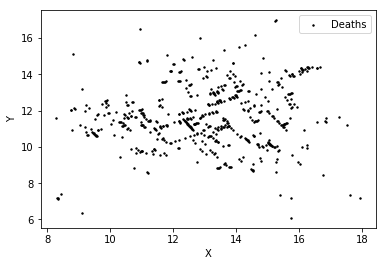

In [26]:
ax = death_df.plot(x='X', y='Y', s=2, c='black', kind='scatter', label='Deaths')

In [27]:
ax

Then you can pass this axes object to another plot to put both plots in the same axes. 

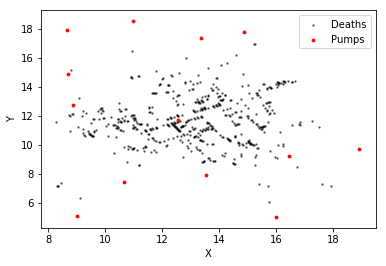

In [28]:
ax = death_df.plot(x='X', y='Y', s=2, c='black', alpha=0.5, kind='scatter', label='Deaths')
pump_df.plot(x='X', y='Y', kind='scatter', c='red', s=8, label='Pumps', ax=ax)

## Voronoi diagram

Let's try the Voronoi diagram. You can use the `scipy.spatial.Voronoi` and `scipy.spatial.voronoi_plot_2d` from `scipy`, the *scientific python* library. 

In [29]:
from scipy.spatial import Voronoi, voronoi_plot_2d

Take a look at the documentation of [Voronoi](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.Voronoi.html#scipy.spatial.Voronoi) and [voronoi_plot_2d](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.voronoi_plot_2d.html) and 

**Q3: produce a Voronoi diagram that shows the deaths, pumps, and voronoi cells**

In [30]:
# you'll need this
points = pump_df.as_matrix()
points

array([[ 8.6512012, 17.8915997],
       [10.9847803, 18.5178509],
       [13.37819  , 17.3945408],
       [14.8798304, 17.8099194],
       [ 8.694768 , 14.9054699],
       [ 8.8644161, 12.75354  ],
       [12.5713596, 11.72717  ],
       [10.6609697,  7.428647 ],
       [13.5214596,  7.95825  ],
       [16.4348907,  9.2521296],
       [18.9143906,  9.7378187],
       [16.0051098,  5.0468378],
       [ 8.9994402,  5.1010232]])

In [31]:
# TODO: your code here

## Saving the figure

You can also save your figure into PDF, PNG, etc. If you run the following, the plot will not only be displayed here, but also be saved as `foo.png`. 

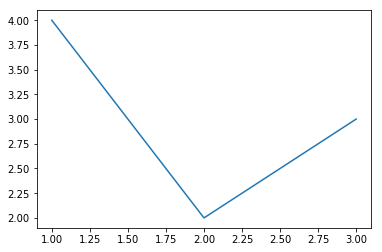

In [32]:
import matplotlib.pyplot as plt
plt.plot([1,2,3], [4,2,3])
plt.savefig('foo.png')

**Q4: Save your Voronoi diagram. Make sure that your plot contains the scatterplot of deaths & pumps as well as the Voronoi cells**

In [33]:
# TODO: your code here

Ok, that was a brief introduction to `pandas` and some simple visualizations. Now let's talk about web a little bit. 

## HTML & CSS Basics

### Seting up a local Python web server

Many browsers don't allow loading files locally due to security concerns. If you work with Javascript and datasets, this can cause some troubles. We can get around by simply running a local web server with Python (did you know that there is a simple HTTP server module in Python? 😎):

- Open the Command Prompt (windows) or your terminal.
- Move to the working directory by typing `cd <FOLDER_LOCATION>`. If you run your webserver here, then this becomes the root of the website. 
- Type 

    `python -m http.server`.
   

If successful, you'll see

	Serving HTTP on 0.0.0.0 port 8000 …
	
This means that now your computer is running a webserver and its IP address is 0.0.0.0 and the port is 8000. Now you can open a browser and type "0.0.0.0:8000" on the address bar to connect to this webserver. Equivalently, you can type "localhost:8000". After typing, click on the different links. You can also directly access one of these links by typing in `localhost:8000/NAME_OF_YOUR_FILE.html` in the address bar.

### HTML review

Webpages are written in a standard markup language called HTML (HyperText Markup Language). The basic syntax of HTML consists of elements enclosed within `<` and `>` symbols. Browsers such as Firefox and Chrome parse these tags and *render* the content of a webpage in the designated format. 

Here is a list of important tags and their descriptions.

- `html` - Surrounds the entire document.

- `head` - Contains info about the document itself. E.g. the title, any external stylesheets or scripts, etc.

- `title` - Assigns title to page. This title is used while bookmarking.

- `body` - The main part of the document.

- `h1`, `h2`, `h3`, ... - Headings (Smaller the number, larger the size).

- `p` - Paragraph.

- `br` - Line break.

- `em` - emphasize text.

- `strong` or `b` - Bold font.

- `a` - Defines a hyperlink and allows you to link out to the other webpages.

- `img` - Place an image.

- `ul`, `ol`, `li` - Unordered lists with bullets, ordered lists with numbers and each item in list respectively.

- `table`, `th`, `td`, `tr` - Make a table, specifying contents of each cell.

- `<!-->` - Comments – will not be displayed.

- `span` - This will not visibly change anything on the webpage. But it is important while referencing in CSS or JavaScript. It spans a section of text, say, within a paragraph.

- `div` - This will not visibly change anything on the webpage. But it is important while referencing in CSS or JavaScript. It stands for division and allocates a section of a page.

### CSS review

While HTML directly deals with the content and structure, CSS (Cascading Style Sheets) is the primary language that is used for the look and formatting of a web document.

A CSS stylesheet consists of one or more selectors, properties and values. For example:

	body {   
  	  background-color: white;   
  	  color: steelblue;   
	}
	
Selectors are the HTML elements to which the specific styles (combination of properties and values) will be applied. In the above example, all text within the `body` tags will be in steelblue.

There are three ways to include CSS code in HTML. This is called "referencing".

Embed CSS in HTML - You can place the CSS code within `style` tags inside the `head` tags. This way you can keep everything within a single HTML file but does make the code lengthy.

    <head>  			
        <style type="text/css" 	
        .description {
        font: 16px times-new-roman;
        }
        .viz {
        font: 10px sans-serif;
        } 
        </style>
	
Reference an external stylesheet from HTML - This is a much cleaner way but results in the creation of another file. To do this, you can copy the CSS code into a text file and save it as a .css file in the same folder as the HTML file. In the document head in the HTML code, you can then do the following:

	<head>
 	 <link rel="stylesheet" href="stylesheet.css">
	</head>
	
Attach inline styles - You can also directly attach the styles in-line along with the main HTML code in the body. This makes it easy to customize specific elements but makes the code very messy, because the design and content get mixed up.

	<p style="color: green; font-size:36px; font-weight:bold;">
    Inline styles can be handy sometimes.
    </p>


**Q5: Create a simple HTML page that displays the Voronoi diagram that you saved. Feel free to add more plots, explanations, and any styles. Make sure to check you can run the Python webserver and open the HTML file that you created. **

Btw, you can also export Jupyter notebook into various formats. Click `File -> Export Notebook As` and play with it. 

## Now submit your work

Rename your `.ipynb` and `HTML` (CSS) files in the format of `lab02_lastname_firstname`, and upload to Canvas. 